In [1]:
import pandas as pd

In [2]:
GDP = pd.read_csv("data/economic_indicators/GDP")
FEDFUNDS = pd.read_csv("data/economic_indicators/FEDFUNDS")
CPIAUCSL = pd.read_csv("data/economic_indicators/CPIAUCSL")
UNRATE = pd.read_csv("data/economic_indicators/UNRATE")
GS10 = pd.read_csv("data/economic_indicators/GS10")
INDPRO = pd.read_csv("data/economic_indicators/INDPRO")
PPIACO = pd.read_csv("data/economic_indicators/PPIACO")
RSXFS = pd.read_csv("data/economic_indicators/RSXFS")
HOUST = pd.read_csv("data/economic_indicators/HOUST")
PSAVERT = pd.read_csv("data/economic_indicators/PSAVERT")




In [3]:
indicators = [
            GDP, CPIAUCSL, UNRATE, FEDFUNDS, GS10,
        INDPRO, PPIACO, RSXFS, HOUST, PSAVERT
    ]
for ind in indicators:
    print(ind.shape)

(309, 2)
(928, 2)
(916, 2)
(838, 2)
(853, 2)
(1264, 2)
(1336, 2)
(388, 2)
(784, 2)
(783, 2)


In [4]:
for ind in indicators:
    ind.columns = ['Date', ind.columns[1]]

# Merging based on the 'Date' column
merged_df = GDP
for ind in indicators[1:]:
    merged_df = pd.merge(merged_df, ind, on='Date', how='outer')

# Check the shape of the merged DataFrame
print(merged_df.shape)

(1336, 11)


In [5]:
merged_df.dropna(inplace=True)


In [6]:
merged_df.shape

(129, 11)

In [7]:
merged_df.to_csv("./data/indicators.csv")

In [8]:
from data_collection.collect_num_data import get_economic_indicators, get_historical_prices, get_dividends_and_earnings


In [9]:
portfolio_csv = "portfolio_files/Apr-2025 portfolio.csv"
portfolio_df = pd.read_csv(portfolio_csv)
portfolio_symbols = portfolio_df["Symbol"]


FileNotFoundError: [Errno 2] No such file or directory: 'portfolio_files/Apr-2025 portfolio.csv'

In [10]:
import matplotlib.pyplot as plt


In [11]:
for symbol in ["GOOG"]:
    hist_data = get_historical_prices(symbol)
    try:
        hist_data.index = pd.to_datetime(hist_data.index)
        hist_data.index = hist_data.index.strftime('%Y-%m-%d')
    except Exception as e:
        print(e)
    hist_data.to_csv(f"./data/historical/{symbol}.csv")


In [12]:
tmp = get_historical_prices("GOOG")
tmp.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [13]:
indicators_df = pd.read_csv("data/indicators.csv")

In [14]:
indicators_df

,Unnamed: 0,Date,GDP,CPIAUCSL,UNRATE,FEDFUNDS,GS10,INDPRO,PPIACO,RSXFS,HOUST,PSAVERT
0,948,1992-01-01,6363.102,138.300,7.3,4.03,7.03,61.4898,115.600,146925.0,1176.0,9.5
1,951,1992-04-01,6470.763,139.400,7.4,3.73,7.48,62.9312,116.300,148032.0,1099.0,9.8
2,954,1992-07-01,6566.641,140.500,7.7,3.25,6.84,63.7408,117.900,150761.0,1139.0,9.5
3,957,1992-10-01,6680.803,141.700,7.3,3.10,6.59,64.0282,118.100,153521.0,1244.0,7.9
4,960,1993-01-01,6729.459,142.800,7.3,3.02,6.60,64.6256,118.000,157555.0,1210.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...
124,1320,2023-01-01,26813.601,300.356,3.4,4.33,3.53,102.5478,260.227,603496.0,1361.0,4.4
125,1323,2023-04-01,27063.012,303.032,3.4,4.83,3.46,103.1512,256.908,595397.0,1368.0,5.2
126,1326,2023-07-01,27610.128,304.628,3.5,5.12,3.90,103.1900,253.835,599037.0,1473.0,4.4
127,1329,2023-10-01,27956.998,307.531,3.8,5.33,4.80,102.5683,255.192,606596.0,1365.0,4.0


In [15]:
goog_df =  pd.read_csv("data/historical/GOOG.csv")
jpm_df =  pd.read_csv("data/historical/JPM.csv")
msft_df =  pd.read_csv("data/historical/MSFT.csv")
nvda_df =  pd.read_csv("data/historical/NVDA.csv")
voo_df =  pd.read_csv("data/historical/VOO.csv")

In [16]:
dataframes = {
    'GOOG': goog_df,
}

In [17]:
combined_df = pd.concat([df.set_index('Date') for df in dataframes.values()], axis=1, keys=dataframes.keys())
combined_df.reset_index(inplace=True)

In [18]:
combined_df

Date        GOOG                                               
                        Open        High         Low       Close     Volume
0     2004-08-19    2.484562    2.585435    2.384187    2.493011  897427216
1     2004-08-20    2.509657    2.710161    2.496986    2.691030  458857488
2     2004-08-23    2.751654    2.819482    2.709416    2.718112  366857939
3     2004-08-24    2.763828    2.772772    2.573261    2.605561  306396159
4     2004-08-25    2.607797    2.683328    2.580964    2.633636  184645512
...          ...         ...         ...         ...         ...        ...
5044  2024-09-04  157.867190  160.189131  157.233030  157.602539   17410700
5045  2024-09-05  157.572581  160.803329  157.312928  158.391510   14139500
5046  2024-09-06  158.481381  159.010683  151.735257  151.930008   24999100
5047  2024-09-09  153.630005  154.639999  148.199997  149.539993   28031400
5048  2024-09-10  151.529999  152.300003  149.542694  150.130005    9175069

[5049 rows x 6 columns]

In [19]:
indicators_df['Date'] = pd.to_datetime(indicators_df['Date'])
combined_df['Date'] = pd.to_datetime(combined_df['Date'])


In [20]:
# Flatten MultiIndex columns
combined_df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in combined_df.columns]

# Ensure 'Date' column is correctly named
if 'Date_' in combined_df.columns:
    combined_df.rename(columns={'Date_': 'Date'}, inplace=True)


In [21]:
full_df = pd.merge(combined_df, indicators_df, on='Date', how='left')


In [29]:
full_df

,Date,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,GOOG_Volume,Unnamed: 0,GDP,CPIAUCSL,UNRATE,FEDFUNDS,GS10,INDPRO,PPIACO,RSXFS,HOUST,PSAVERT
0,2004-08-19,2.484562,2.585435,2.384187,2.493011,897427216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-08-20,2.509657,2.710161,2.496986,2.691030,458857488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-08-23,2.751654,2.819482,2.709416,2.718112,366857939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-08-24,2.763828,2.772772,2.573261,2.605561,306396159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-08-25,2.607797,2.683328,2.580964,2.633636,184645512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,2024-09-04,157.867190,160.189131,157.233030,157.602539,17410700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5045,2024-09-05,157.572581,160.803329,157.312928,158.391510,14139500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5046,2024-09-06,158.481381,159.010683,151.735257,151.930008,24999100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5047,2024-09-09,153.630005,154.639999,148.199997,149.539993,28031400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)


In [31]:
full_df_imputed = full_df.copy()
full_df_imputed.iloc[:, 1:] = imputer.fit_transform(full_df_imputed.iloc[:, 1:])


In [32]:
full_df_imputed

,Date,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,GOOG_Volume,Unnamed: 0,GDP,CPIAUCSL,UNRATE,FEDFUNDS,GS10,INDPRO,PPIACO,RSXFS,HOUST,PSAVERT
0,2004-08-19,2.484562,2.585435,2.384187,2.493011,897427216,1122.0,13613.2844,202.0674,5.44,2.212,4.022,96.65428,167.720,312413.6,1595.4,2.94
1,2004-08-20,2.509657,2.710161,2.496986,2.691030,458857488,1122.0,13613.2844,202.0674,5.44,2.212,4.022,96.65428,167.720,312413.6,1595.4,2.94
2,2004-08-23,2.751654,2.819482,2.709416,2.718112,366857939,1122.0,13613.2844,202.0674,5.44,2.212,4.022,96.65428,167.720,312413.6,1595.4,2.94
3,2004-08-24,2.763828,2.772772,2.573261,2.605561,306396159,1122.0,13613.2844,202.0674,5.44,2.212,4.022,96.65428,167.720,312413.6,1595.4,2.94
4,2004-08-25,2.607797,2.683328,2.580964,2.633636,184645512,1158.0,14956.9160,216.7830,7.58,1.434,3.496,94.71790,187.600,324984.0,766.8,5.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,2024-09-04,157.867190,160.189131,157.233030,157.602539,17410700,1282.2,22310.6100,262.6494,4.24,1.014,1.962,101.12094,217.112,486743.2,1452.8,6.52
5045,2024-09-05,157.572581,160.803329,157.312928,158.391510,14139500,1282.2,22310.6100,262.6494,4.24,1.014,1.962,101.12094,217.112,486743.2,1452.8,6.52
5046,2024-09-06,158.481381,159.010683,151.735257,151.930008,24999100,1275.6,21728.3888,258.8050,3.92,1.432,2.328,101.88426,211.662,467964.6,1377.0,5.98
5047,2024-09-09,153.630005,154.639999,148.199997,149.539993,28031400,1258.2,20596.6118,251.9872,4.78,0.970,2.326,102.41466,211.433,446223.6,1241.4,6.20


In [33]:
full_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         5049 non-null   datetime64[ns]
 1   GOOG_Open    5049 non-null   float64       
 2   GOOG_High    5049 non-null   float64       
 3   GOOG_Low     5049 non-null   float64       
 4   GOOG_Close   5049 non-null   float64       
 5   GOOG_Volume  5049 non-null   int64         
 6   Unnamed: 0   5049 non-null   float64       
 7   GDP          5049 non-null   float64       
 8   CPIAUCSL     5049 non-null   float64       
 9   UNRATE       5049 non-null   float64       
 10  FEDFUNDS     5049 non-null   float64       
 11  GS10         5049 non-null   float64       
 12  INDPRO       5049 non-null   float64       
 13  PPIACO       5049 non-null   float64       
 14  RSXFS        5049 non-null   float64       
 15  HOUST        5049 non-null   float64       
 16  PSAVER

In [34]:
import numpy as np

# Feature Engineering


In [35]:
stocks = ['GOOG']
economic_indicators = ['GDP', 'CPIAUCSL', 'UNRATE', 'FEDFUNDS', 'GS10', 'INDPRO', 'PPIACO', 'RSXFS', 'HOUST', 'PSAVERT']


In [36]:
# Log Returns for each stock (Relevant for modeling risk and capturing the stock's behavior over time)
for stock in stocks:
    full_df_imputed[f'{stock}_LogReturn'] = np.log(full_df_imputed[f'{stock}_Close'] / full_df_imputed[f'{stock}_Close'].shift(1))


In [37]:
full_df_imputed.tail()

,Date,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,GOOG_Volume,Unnamed: 0,GDP,CPIAUCSL,UNRATE,FEDFUNDS,GS10,INDPRO,PPIACO,RSXFS,HOUST,PSAVERT,GOOG_LogReturn
5044,2024-09-04,157.867190,160.189131,157.233030,157.602539,17410700,1282.2,22310.6100,262.6494,4.24,1.014,1.962,101.12094,217.112,486743.2,1452.8,6.52,-0.005057
5045,2024-09-05,157.572581,160.803329,157.312928,158.391510,14139500,1282.2,22310.6100,262.6494,4.24,1.014,1.962,101.12094,217.112,486743.2,1452.8,6.52,0.004994
5046,2024-09-06,158.481381,159.010683,151.735257,151.930008,24999100,1275.6,21728.3888,258.8050,3.92,1.432,2.328,101.88426,211.662,467964.6,1377.0,5.98,-0.041650
5047,2024-09-09,153.630005,154.639999,148.199997,149.539993,28031400,1258.2,20596.6118,251.9872,4.78,0.970,2.326,102.41466,211.433,446223.6,1241.4,6.20,-0.015856
5048,2024-09-10,151.529999,152.300003,149.542694,150.130005,9175069,1276.8,22035.7838,261.9228,4.52,0.954,2.204,101.72224,221.232,483306.4,1413.6,6.58,0.003938


In [38]:
# Rolling Volatility for each stock (Relevant for identifying periods of high/low risk)
for stock in stocks:
    full_df_imputed[f'{stock}_RollingVolatility_30d'] = full_df_imputed[f'{stock}_LogReturn'].rolling(window=30).std()


In [39]:
# Percentage changes in economic indicators (Capture macroeconomic shifts and trends, important for risk modeling)
for indicator in economic_indicators:
    full_df_imputed[f'{indicator}_PctChange'] = full_df_imputed[indicator].pct_change()


In [40]:
# Moving averages of stock closing prices (Relevant for identifying trends and stock behavior over time)
for stock in stocks:
    full_df_imputed[f'{stock}_MA10'] = full_df_imputed[f'{stock}_Close'].rolling(window=10).mean()  # Short-term trend
    full_df_imputed[f'{stock}_MA200'] = full_df_imputed[f'{stock}_Close'].rolling(window=200).mean()  # Long-term trend


In [41]:
# Lag features for log returns and economic indicators (Relevant for capturing past behavior and predicting future movements)
lags = [1, 5, 10]
for stock in stocks:
    for lag in lags:
        full_df_imputed[f'{stock}_LogReturn_Lag{lag}'] = full_df_imputed[f'{stock}_LogReturn'].shift(lag)

for indicator in economic_indicators:
    for lag in lags:
        full_df_imputed[f'{indicator}_PctChange_Lag{lag}'] = full_df_imputed[f'{indicator}_PctChange'].shift(lag)

In [42]:
# Maximum drawdown for each stock (Capture the largest loss from peak to trough, relevant for modeling worst-case scenarios)
for stock in stocks:
    full_df_imputed[f'{stock}_MaxDrawdown'] = full_df_imputed[f'{stock}_Close'].rolling(window=252, min_periods=1).apply(lambda x: (x.max() - x.min()) / x.max(), raw=True)

In [43]:
# Rolling correlation between stock log returns (Relevant for understanding stock relationships, which can impact portfolio risk)
for i, stock1 in enumerate(stocks):
    for stock2 in stocks[i+1:]:
        full_df_imputed[f'{stock1}_{stock2}_RollingCorr_30d'] = full_df_imputed[f'{stock1}_LogReturn'].rolling(window=30).corr(full_df_imputed[f'{stock2}_LogReturn'])

In [44]:
# Rolling correlation between stock returns and economic indicators (Capture how economic factors affect stock movements)
for stock in stocks:
    for indicator in economic_indicators:
        full_df_imputed[f'{stock}_{indicator}_RollingCorr_30d'] = full_df_imputed[f'{stock}_LogReturn'].rolling(window=30).corr(full_df_imputed[f'{indicator}_PctChange'])


In [45]:
# Outlier detection (Flagging large returns for risk identification, which may indicate unusual events or risks)
for stock in stocks:
    full_df_imputed[f'{stock}_Outliers'] = np.abs(full_df_imputed[f'{stock}_LogReturn']) > (full_df_imputed[f'{stock}_LogReturn'].mean() + 3 * full_df_imputed[f'{stock}_LogReturn'].std())

In [46]:
full_df_imputed.isnull().sum()

Date                             0
GOOG_Open                        0
GOOG_High                        0
GOOG_Low                         0
GOOG_Close                       0
                                ..
GOOG_PPIACO_RollingCorr_30d     32
GOOG_RSXFS_RollingCorr_30d      37
GOOG_HOUST_RollingCorr_30d      37
GOOG_PSAVERT_RollingCorr_30d    37
GOOG_Outliers                    0
Length: 76, dtype: int64

In [47]:
full_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           5049 non-null   datetime64[ns]
 1   GOOG_Open                      5049 non-null   float64       
 2   GOOG_High                      5049 non-null   float64       
 3   GOOG_Low                       5049 non-null   float64       
 4   GOOG_Close                     5049 non-null   float64       
 5   GOOG_Volume                    5049 non-null   int64         
 6   Unnamed: 0                     5049 non-null   float64       
 7   GDP                            5049 non-null   float64       
 8   CPIAUCSL                       5049 non-null   float64       
 9   UNRATE                         5049 non-null   float64       
 10  FEDFUNDS                       5049 non-null   float64       
 11  GS10             

In [48]:
# Drop NaN values caused by the shift and rolling operations
full_df_imputed.dropna(inplace=True)

In [49]:
full_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4839 entries, 199 to 5048
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           4839 non-null   datetime64[ns]
 1   GOOG_Open                      4839 non-null   float64       
 2   GOOG_High                      4839 non-null   float64       
 3   GOOG_Low                       4839 non-null   float64       
 4   GOOG_Close                     4839 non-null   float64       
 5   GOOG_Volume                    4839 non-null   int64         
 6   Unnamed: 0                     4839 non-null   float64       
 7   GDP                            4839 non-null   float64       
 8   CPIAUCSL                       4839 non-null   float64       
 9   UNRATE                         4839 non-null   float64       
 10  FEDFUNDS                       4839 non-null   float64       
 11  GS10                

In [50]:
full_df_imputed.columns

Index(['Date', 'GOOG_Open', 'GOOG_High', 'GOOG_Low', 'GOOG_Close',
       'GOOG_Volume', 'Unnamed: 0', 'GDP', 'CPIAUCSL', 'UNRATE', 'FEDFUNDS',
       'GS10', 'INDPRO', 'PPIACO', 'RSXFS', 'HOUST', 'PSAVERT',
       'GOOG_LogReturn', 'GOOG_RollingVolatility_30d', 'GDP_PctChange',
       'CPIAUCSL_PctChange', 'UNRATE_PctChange', 'FEDFUNDS_PctChange',
       'GS10_PctChange', 'INDPRO_PctChange', 'PPIACO_PctChange',
       'RSXFS_PctChange', 'HOUST_PctChange', 'PSAVERT_PctChange', 'GOOG_MA10',
       'GOOG_MA200', 'GOOG_LogReturn_Lag1', 'GOOG_LogReturn_Lag5',
       'GOOG_LogReturn_Lag10', 'GDP_PctChange_Lag1', 'GDP_PctChange_Lag5',
       'GDP_PctChange_Lag10', 'CPIAUCSL_PctChange_Lag1',
       'CPIAUCSL_PctChange_Lag5', 'CPIAUCSL_PctChange_Lag10',
       'UNRATE_PctChange_Lag1', 'UNRATE_PctChange_Lag5',
       'UNRATE_PctChange_Lag10', 'FEDFUNDS_PctChange_Lag1',
       'FEDFUNDS_PctChange_Lag5', 'FEDFUNDS_PctChange_Lag10',
       'GS10_PctChange_Lag1', 'GS10_PctChange_Lag5', 'GS10_PctCha

In [51]:
boolean_columns = full_df_imputed.select_dtypes(include='bool').columns
full_df_imputed[boolean_columns] = full_df_imputed[boolean_columns].astype(int)


In [52]:
full_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4839 entries, 199 to 5048
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           4839 non-null   datetime64[ns]
 1   GOOG_Open                      4839 non-null   float64       
 2   GOOG_High                      4839 non-null   float64       
 3   GOOG_Low                       4839 non-null   float64       
 4   GOOG_Close                     4839 non-null   float64       
 5   GOOG_Volume                    4839 non-null   int64         
 6   Unnamed: 0                     4839 non-null   float64       
 7   GDP                            4839 non-null   float64       
 8   CPIAUCSL                       4839 non-null   float64       
 9   UNRATE                         4839 non-null   float64       
 10  FEDFUNDS                       4839 non-null   float64       
 11  GS10                

In [53]:
full_df_imputed

,Date,GOOG_Open,GOOG_High,GOOG_Low,GOOG_Close,GOOG_Volume,Unnamed: 0,GDP,CPIAUCSL,UNRATE,...,GOOG_CPIAUCSL_RollingCorr_30d,GOOG_UNRATE_RollingCorr_30d,GOOG_FEDFUNDS_RollingCorr_30d,GOOG_GS10_RollingCorr_30d,GOOG_INDPRO_RollingCorr_30d,GOOG_PPIACO_RollingCorr_30d,GOOG_RSXFS_RollingCorr_30d,GOOG_HOUST_RollingCorr_30d,GOOG_PSAVERT_RollingCorr_30d,GOOG_Outliers
199,2005-06-03,7.125477,7.187840,6.892425,6.963236,754108027,1122.0,13613.2844,202.0674,5.44,...,-0.077812,0.026531,-0.084014,-0.071424,-0.084867,-0.073863,-0.084431,0.070052,0.003873,0
200,2005-06-06,7.016157,7.298404,7.002243,7.228587,904413304,1122.0,13613.2844,202.0674,5.44,...,-0.082359,0.028324,-0.087804,-0.075682,-0.089952,-0.077941,-0.089382,0.075740,0.004849,0
201,2005-06-07,7.381636,7.443501,7.212686,7.282750,976566743,1122.0,13613.2844,202.0674,5.44,...,-0.084799,0.029553,-0.088601,-0.078060,-0.092820,-0.079866,-0.092056,0.080554,0.006201,0
202,2005-06-08,7.276042,7.284490,6.907084,6.945843,1031889331,1122.0,13613.2844,202.0674,5.44,...,-0.076087,0.026845,-0.077980,-0.070154,-0.083453,-0.071338,-0.082620,0.074439,0.006581,0
203,2005-06-09,7.074047,7.167963,6.970689,7.113551,660109011,1122.0,13613.2844,202.0674,5.44,...,-0.075588,0.026427,-0.078592,-0.069610,-0.082781,-0.071109,-0.082062,0.072352,0.005785,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,2024-09-04,157.867190,160.189131,157.233030,157.602539,17410700,1282.2,22310.6100,262.6494,4.24,...,0.568006,-0.364610,0.081844,0.192860,0.276589,0.503876,0.568454,0.490187,-0.312941,0
5045,2024-09-05,157.572581,160.803329,157.312928,158.391510,14139500,1282.2,22310.6100,262.6494,4.24,...,0.503723,-0.267390,0.052698,0.215208,0.314750,0.591430,0.473037,0.314487,-0.438827,0
5046,2024-09-06,158.481381,159.010683,151.735257,151.930008,24999100,1275.6,21728.3888,258.8050,3.92,...,0.538267,-0.216915,0.037205,0.069571,0.266671,0.604298,0.560261,0.447668,-0.321407,0
5047,2024-09-09,153.630005,154.639999,148.199997,149.539993,28031400,1258.2,20596.6118,251.9872,4.78,...,0.575838,-0.247314,0.045111,0.070564,0.252147,0.600444,0.598020,0.505598,-0.322939,0


# Modeling

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
target_stock = 'GOOG'
target_variable = f'{target_stock}_LogReturn'

In [63]:
from sklearn.preprocessing import StandardScaler

# List of features (excluding the 'Date' column and the target variable)
features = full_df_imputed.columns.difference(['Date', 'GOOG_LogReturn'])

# Initialize a scaler
scaler = StandardScaler()

# Scale the features
df_scaled = full_df_imputed.copy()
df_scaled[features] = scaler.fit_transform(full_df_imputed[features])


In [64]:
from sklearn.model_selection import train_test_split

# Define target variable (e.g., GOOG log returns for VaR calculation)
target = 'GOOG_LogReturn'

# Create feature matrix (X) and target vector (y)
X = df_scaled[features].values
y = df_scaled[target].values

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [65]:
# Reshape to 3D [samples, time steps, features] for LSTM input
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()

# LSTM layer with 50 units
model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

# Dropout to prevent overfitting
model.add(Dropout(0.2))

# Dense layer for final output
model.add(Dense(1))

# Compile the model
model.compile(optimizer='nadam', loss='mean_squared_error')

D:\Risk_management_model\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [78]:
def quantile_loss(q, y_true, y_pred):
    e = (y_true - y_pred)
    return tf.reduce_mean(tf.maximum(q * e, (q - 1) * e), axis=-1)

# For example, 5th percentile (95% VaR)
q = 0.05
model.compile(optimizer='nadam', loss=lambda y_true, y_pred: quantile_loss(q, y_true, y_pred))


In [79]:
# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, validation_data=(X_test_reshaped, y_test), verbose=1)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0011 - val_loss: 0.0040
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 0.0037
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 0.0037
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 - val_loss: 0.0041
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 - val_loss: 0.0038
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 0.0041
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 0.0038
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 0.0037
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_lo

In [80]:
from sklearn.metrics import mean_squared_error

# Predict on test set
y_pred = model.predict(X_test_reshaped)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Mean Squared Error: 0.005392327902067957


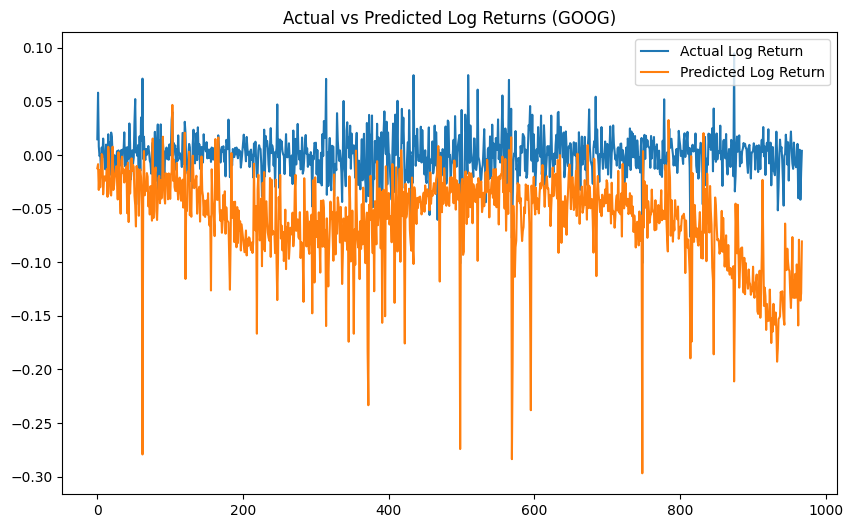

In [81]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Log Return')
plt.plot(y_pred, label='Predicted Log Return')
plt.title('Actual vs Predicted Log Returns (GOOG)')
plt.legend()
plt.show()


In [82]:
# Calculate exceedances where actual return < predicted VaR
exceedances = (y_test < y_pred.flatten()).sum()
exceedance_ratio = exceedances / len(y_test)

print(f'Number of exceedances: {exceedances}')
print(f'Exceedance ratio: {exceedance_ratio}')


Number of exceedances: 36
Exceedance ratio: 0.0371900826446281


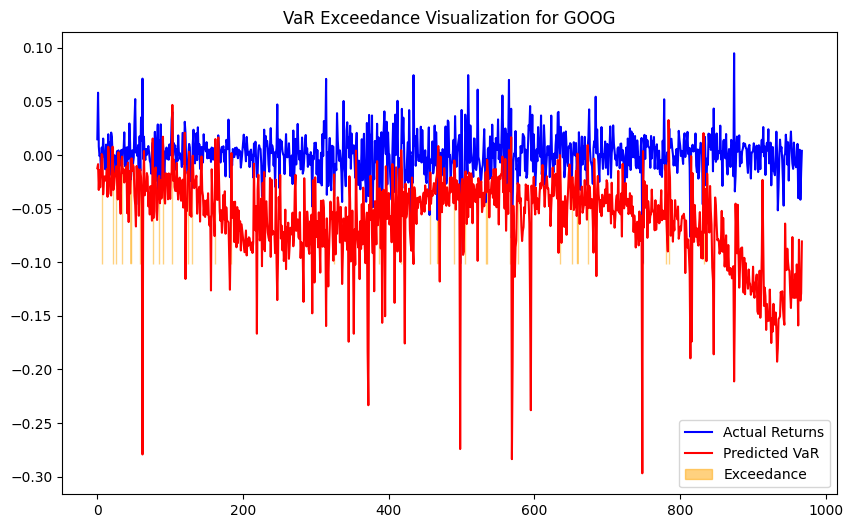

In [83]:
# Plot exceedances where actual return is less than predicted VaR
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Returns', color='blue')
plt.plot(y_pred, label='Predicted VaR', color='red')
plt.fill_between(range(len(y_test)), y_pred.flatten(), min(y_test), where=y_test < y_pred.flatten(), color='orange', alpha=0.5, label='Exceedance')
plt.title('VaR Exceedance Visualization for GOOG')
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select relevant features (excluding 'Date')
features = full_df_imputed.columns.difference(['Date'])
X = full_df_imputed[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=features)


In [ ]:

def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X.iloc[i:(i + time_steps)].values)
        ys.append(y.iloc[i + time_steps].values)
    return np.array(Xs), np.array(ys)

time_steps = 1
closing_prices = full_df_imputed[[col for col in full_df_imputed.columns if 'Close' in col]]
X_sequences, y_sequences = create_sequences(X_scaled_df, closing_prices, time_steps)

# Split into training and testing sets
train_size = int(len(X_sequences) * 0.8)
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]


In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(y_train.shape[1]))  # Output layer for multiple features (closing prices of all tickers)




In [ ]:
model.compile(optimizer='nadam', loss='mean_squared_error')


In [ ]:
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.1)


In [ ]:
model.evaluate(X_test, y_test)


In [ ]:
predictions = model.predict(X_test)
returns = pd.DataFrame(predictions - y_test, columns=closing_prices.columns)  # Calculate returns from predictions

def calculate_var(returns, confidence_level=0.95):
    sorted_returns = np.sort(returns, axis=0)
    index = int((1 - confidence_level) * sorted_returns.shape[0])
    return sorted_returns[index]

def calculate_cvar(returns, var):
    return np.mean(returns[returns <= var], axis=0)

var_95 = calculate_var(returns, 0.95)
cvar_95 = calculate_cvar(returns, var_95)

print(f"Value at Risk (95%): {var_95}")
print(f"Conditional Value at Risk (95%): {cvar_95}")
